In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data=pd.read_csv(r'D:\first_project\sales_data.csv')
data.info

<bound method DataFrame.info of       sale_id customer_id campaign_id   sale_date product_category  quantity  \
0      S00001    CUST1149        C021  2023-11-04         Clothing         1   
1      S00002    CUST0041        C099  2023-11-15           Beauty         4   
2      S00003    CUST3757        C050  2023-06-06           Beauty         2   
3      S00004    CUST3757        C083  2023-05-06         Clothing         2   
4      S00005    CUST3411        C006  2023-03-27         Clothing         4   
...       ...         ...         ...         ...              ...       ...   
19995  S19996    CUST4079        C098  2023-04-28           Beauty         3   
19996  S19997    CUST4093        C020  2023-01-05      Accessories         4   
19997  S19998    CUST2081        C047  2023-07-13         Clothing         2   
19998  S19999    CUST3871        C010  2023-06-29         Footwear         1   
19999  S20000    CUST1744        C065  2023-08-02         Footwear         2   

       

In [104]:
data.head()

,sale_id,customer_id,campaign_id,sale_date,product_category,quantity,unit_price,discount,total_amount
0,S00001,CUST1149,C021,2023-11-04,Clothing,1,161.92,0.1,145.73
1,S00002,CUST0041,C099,2023-11-15,Beauty,4,175.18,0.0,700.72
2,S00003,CUST3757,C050,2023-06-06,Beauty,2,100.99,0.2,161.58
3,S00004,CUST3757,C083,2023-05-06,Clothing,2,79.95,0.1,143.91
4,S00005,CUST3411,C006,2023-03-27,Clothing,4,119.62,0.3,334.94


In [105]:
data.columns

Index(['sale_id', 'customer_id', 'campaign_id', 'sale_date',
       'product_category', 'quantity', 'unit_price', 'discount',
       'total_amount'],
      dtype='object')

In [106]:
data.describe()

,quantity,unit_price,discount,total_amount
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.486100,110.038933,0.150690,232.220268
std,1.116006,51.965379,0.112326,162.845448
min,1.000000,20.050000,0.000000,14.060000
25%,1.000000,64.827500,0.000000,103.187500
50%,2.000000,110.215000,0.200000,187.410000
75%,3.000000,154.900000,0.300000,331.395000
max,4.000000,199.990000,0.300000,797.560000


In [107]:
data.isnull

<bound method DataFrame.isnull of       sale_id customer_id campaign_id   sale_date product_category  quantity  \
0      S00001    CUST1149        C021  2023-11-04         Clothing         1   
1      S00002    CUST0041        C099  2023-11-15           Beauty         4   
2      S00003    CUST3757        C050  2023-06-06           Beauty         2   
3      S00004    CUST3757        C083  2023-05-06         Clothing         2   
4      S00005    CUST3411        C006  2023-03-27         Clothing         4   
...       ...         ...         ...         ...              ...       ...   
19995  S19996    CUST4079        C098  2023-04-28           Beauty         3   
19996  S19997    CUST4093        C020  2023-01-05      Accessories         4   
19997  S19998    CUST2081        C047  2023-07-13         Clothing         2   
19998  S19999    CUST3871        C010  2023-06-29         Footwear         1   
19999  S20000    CUST1744        C065  2023-08-02         Footwear         2   

     

In [108]:
numeric_data=data.select_dtypes(include=["int","float"])
numeric_data.columns

Index(['quantity', 'unit_price', 'discount', 'total_amount'], dtype='object')

In [109]:
catagorical_data=data.select_dtypes(include=["object","bool"])
catagorical_data.columns

Index(['sale_id', 'customer_id', 'campaign_id', 'sale_date',
       'product_category'],
      dtype='object')

array([[<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'unit_price'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

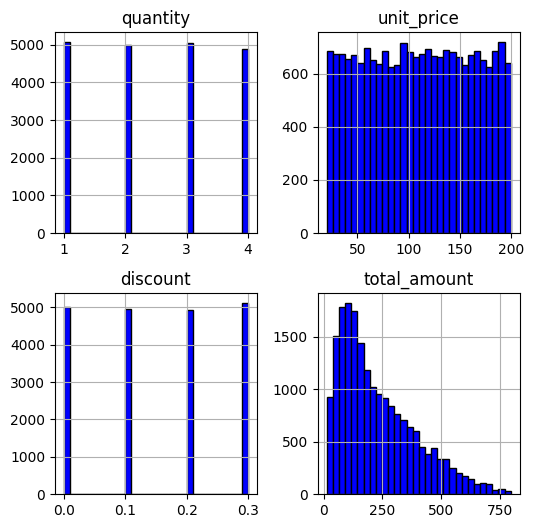

In [110]:
# Plot histograms for all numerical columns
numeric_data.hist(figsize=(6,6),bins=30,color='blue',edgecolor='black')

In [111]:
total_coustmers=data['customer_id'].drop_duplicates().count()
total_coustmers

np.int64(4902)

In [112]:
total_campaign_id=data['campaign_id'].drop_duplicates().count()
total_campaign_id

np.int64(100)

In [113]:
#total sale by campaign id
total_sale_campaignid=data.groupby("campaign_id")["total_amount"].sum().reset_index()
total_sale_campaignid


,campaign_id,total_amount
0,C001,46724.05
1,C002,46534.36
2,C003,48289.94
3,C004,53381.70
4,C005,56881.36
...,...,...
95,C096,52247.73
96,C097,53189.75
97,C098,49616.22
98,C099,37826.93


In [114]:
#AVG.sale by campaign id
Mean_sale_campaignid=data.groupby("campaign_id")["total_amount"].mean().reset_index()
Mean_sale_campaignid


,campaign_id,total_amount
0,C001,242.093523
1,C002,219.501698
2,C003,232.163173
3,C004,248.286977
4,C005,258.551636
...,...,...
95,C096,236.415068
96,C097,237.454241
97,C098,240.855437
98,C099,229.254121


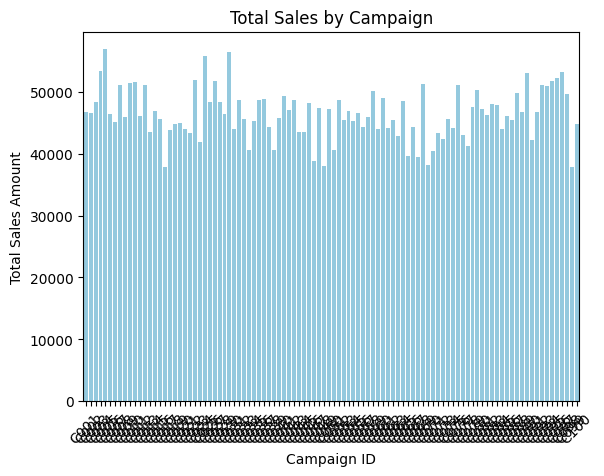

In [115]:
sns.barplot(x='campaign_id', y='total_amount', data=total_sale_campaignid, color="skyblue")
# Labels and title
plt.xlabel("Campaign ID")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales by Campaign")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


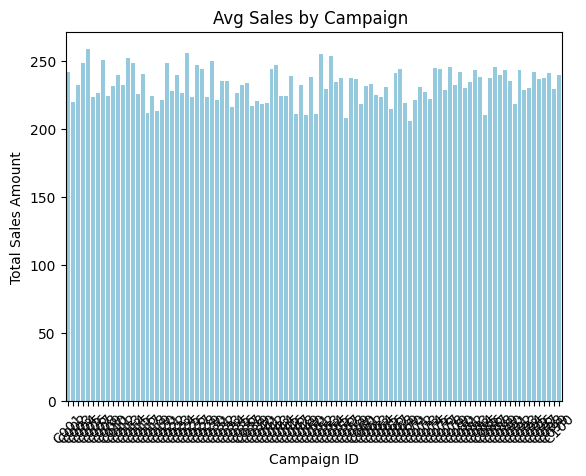

In [116]:
sns.barplot(x='campaign_id', y='total_amount', data=Mean_sale_campaignid, color="skyblue")
# Labels and title
plt.xlabel("Campaign ID")
plt.ylabel("Total Sales Amount")
plt.title("Avg Sales by Campaign ")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [117]:
# Maximum total amount for campaign id
max_total = total_sale_campaignid.loc[total_sale_campaignid["total_amount"].idxmax()]

# Minimum total amount for campaign id
min_total = total_sale_campaignid.loc[total_sale_campaignid["total_amount"].idxmin()]

# Print results
print("📌 Campaign with Maximum Sales:")
print(max_total)

print("\n📌 Campaign with Minimum Sales:")
print(min_total)

📌 Campaign with Maximum Sales:
campaign_id         C005
total_amount    56881.36
Name: 4, dtype: object

📌 Campaign with Minimum Sales:
campaign_id         C099
total_amount    37826.93
Name: 98, dtype: object


In [118]:
#convert sale_date to date and time formart
data.sale_date=pd.to_datetime(data["sale_date"])
data['sale_monthly']=data['sale_date'].dt.to_period('M')

In [119]:
#monthly sale group by campaign_id
monthly_sale_campaignid=data.groupby(["campaign_id","sale_monthly"])["total_amount"].sum().reset_index()
monthly_sale_campaignid

,campaign_id,sale_monthly,total_amount
0,C001,2023-01,5257.60
1,C001,2023-02,3004.12
2,C001,2023-03,4070.08
3,C001,2023-04,4586.85
4,C001,2023-05,2258.42
...,...,...,...
1195,C100,2023-08,3258.26
1196,C100,2023-09,4719.25
1197,C100,2023-10,2153.62
1198,C100,2023-11,3919.98


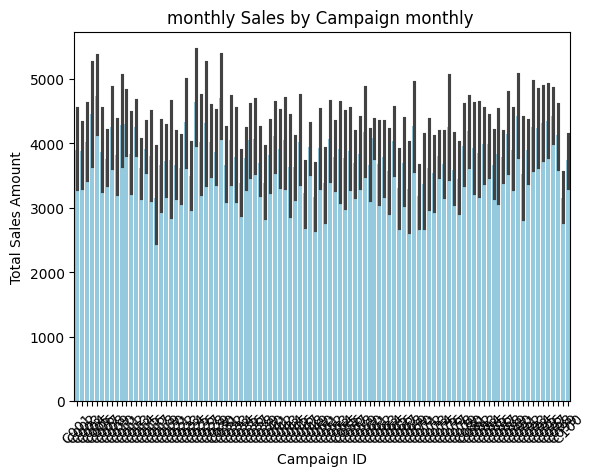

In [146]:
sns.barplot(x='campaign_id', y='total_amount', data=monthly_sale_campaignid, color="skyblue")
# Labels and title
plt.xlabel("Campaign ID")
plt.ylabel("Total Sales Amount")
plt.title("monthly Sales by Campaign monthly ")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [124]:
#monthly total sales 
monthly_total_sales = data.groupby('sale_monthly', as_index=False)['total_amount'].sum()
monthly_total_sales

,sale_monthly,total_amount
0,2023-01,399150.11
1,2023-02,334092.39
2,2023-03,424841.62
3,2023-04,385466.95
4,2023-05,380154.16
5,2023-06,404914.85
6,2023-07,400041.69
7,2023-08,408053.77
8,2023-09,366352.37
9,2023-10,386415.30


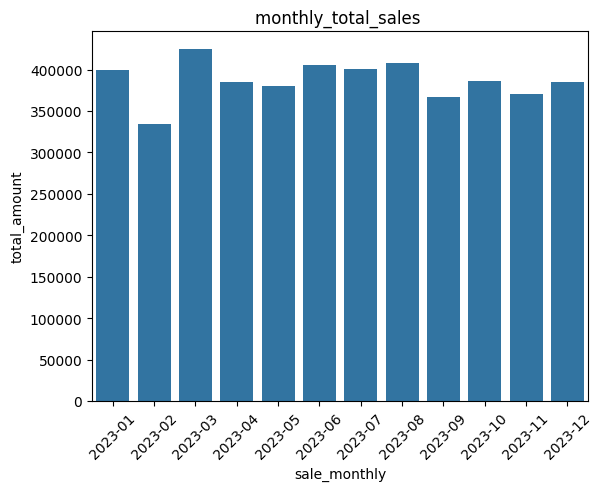

In [125]:
sns.barplot(x='sale_monthly',y='total_amount',data=monthly_total_sales)
# Labels and title
plt.xlabel("sale_monthly")
plt.ylabel("total_amount")
plt.title("monthly_total_sales ")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [121]:
data['product_category'].value_counts()

product_category
Beauty         5086
Footwear       4997
Clothing       4985
Accessories    4932
Name: count, dtype: int64

In [ ]:
#monthly sale by product catagory 
monthly_proct_catagory_sale=data.groupby(['product_category','sale_monthly'],as_index=False)['total_amount'].sum().reset_index()
monthly_proct_catagory_sale

,index,product_category,sale_monthly,total_amount
0,0,Accessories,2023-01,101541.51
1,1,Accessories,2023-02,84987.67
2,2,Accessories,2023-03,101520.10
3,3,Accessories,2023-04,88810.23
4,4,Accessories,2023-05,89817.50
5,5,Accessories,2023-06,101643.00
6,6,Accessories,2023-07,98804.30
7,7,Accessories,2023-08,95545.77
8,8,Accessories,2023-09,92529.74
9,9,Accessories,2023-10,95379.32


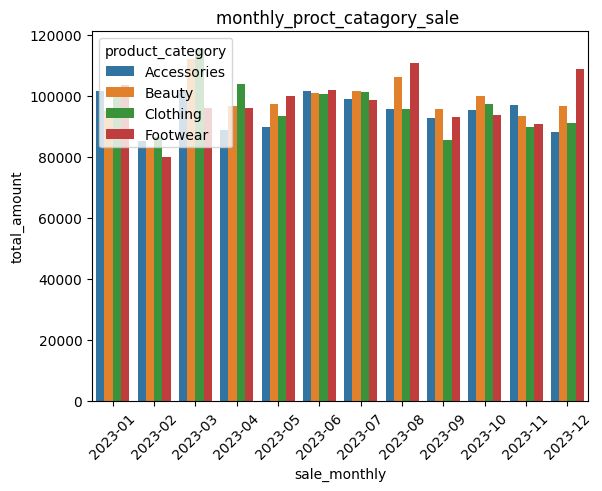

In [137]:
sns.barplot(x='sale_monthly',y='total_amount',hue='product_category',data=monthly_proct_catagory_sale)
# Labels and title

plt.xlabel("sale_monthly")
plt.ylabel("total_amount")
plt.title("monthly_proct_catagory_sale ")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [131]:
#monthly sale by campaign by product catagory 
monthly_product_category_campaignid_sale = data.groupby(
    ['product_category', 'campaign_id', 'sale_monthly'], as_index=False
)['total_amount'].sum()
monthly_product_category_campaignid_sale


,product_category,campaign_id,sale_monthly,total_amount
0,Accessories,C001,2023-01,1699.40
1,Accessories,C001,2023-02,734.15
2,Accessories,C001,2023-03,381.66
3,Accessories,C001,2023-04,1740.53
4,Accessories,C001,2023-05,771.60
...,...,...,...,...
4719,Footwear,C100,2023-08,795.19
4720,Footwear,C100,2023-09,1170.64
4721,Footwear,C100,2023-10,225.66
4722,Footwear,C100,2023-11,177.31


In [132]:
#monthly sale by campaign by product catagory 
monthly_product_category_campaignid_sale = data.groupby(
    ['product_category', 'campaign_id'], as_index=False
)['total_amount'].sum()
monthly_product_category_campaignid_sale

,product_category,campaign_id,total_amount
0,Accessories,C001,13924.85
1,Accessories,C002,9075.71
2,Accessories,C003,10044.92
3,Accessories,C004,14343.36
4,Accessories,C005,16103.21
...,...,...,...
395,Footwear,C096,13742.27
396,Footwear,C097,10959.58
397,Footwear,C098,11336.91
398,Footwear,C099,8191.69


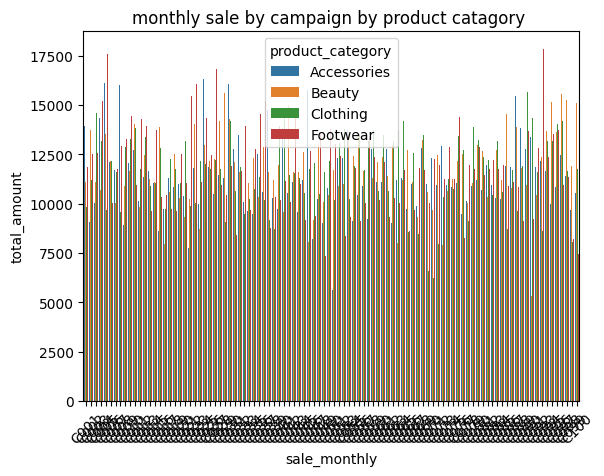

In [138]:
sns.barplot(x='campaign_id',y='total_amount',hue='product_category',data=monthly_product_category_campaignid_sale)
plt.xlabel("sale_monthly")
plt.ylabel("total_amount")
plt.title("monthly sale by campaign by product catagory ")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

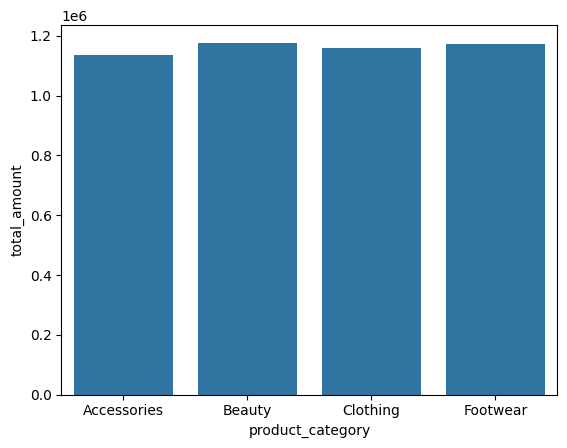

In [144]:
#total sale by catagory
sale_catagory=data.groupby('product_category',as_index=False)['total_amount'].sum()
sale_catagory
sns.barplot(x='product_category',y='total_amount',data=sale_catagory)
plt.show()

In [145]:

sale_catagory

,product_category,total_amount
0,Accessories,1135626.49
1,Beauty,1177311.08
2,Clothing,1159136.23
3,Footwear,1172331.56
